In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# total mortality over people infected with MRSA
infectedmale = 5575
infectedfemale = 3426
malemort = 2105
femalemort = 1345
mortalityrate = (malemort + femalemort) / (infectedmale + infectedfemale)

In [4]:
totalInfection = infectedmale + infectedfemale
totalInfection

9001

In [5]:
mortalityrate

0.38329074547272524

In [6]:
maleInfectionRate = infectedmale / totalInfection
maleInfectionRate

0.6193756249305633

In [7]:
totalmort = malemort + femalemort
totalmort

3450

In [8]:
expectedmalemort = infectedmale * mortalityrate
expectedmalemort

2136.8459060104433

In [9]:
expectedfemalemort = infectedfemale * mortalityrate
expectedfemalemort

1313.1540939895567

In [10]:
monthlymort = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], "MRSA infection": (872, 758, 808, 789, 757, 741, 785, 731, 650, 681,708, 721),"7 day mortality": (207, 176, 184, 162, 148, 143, 147, 123, 115, 133, 139, 148), "30 day mortality": (385, 318, 332, 299, 287, 292, 281, 235, 231, 259, 253, 278) })

In [11]:
monthlymort

,Month,MRSA infection,7 day mortality,30 day mortality
0,Jan,872,207,385
1,Feb,758,176,318
2,Mar,808,184,332
3,Apr,789,162,299
4,May,757,148,287
5,Jun,741,143,292
6,Jul,785,147,281
7,Aug,731,123,235
8,Sep,650,115,231
9,Oct,681,133,259


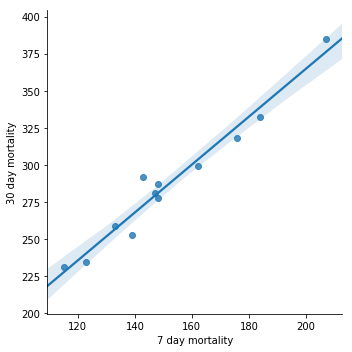

In [12]:
sns.lmplot(x="7 day mortality", y="30 day mortality", data=monthlymort)

In [13]:
monthlymort.sum()

Month               JanFebMarAprMayJunJulAugSepOctNovDec
MRSA infection                                      9001
7 day mortality                                     1825
30 day mortality                                    3450
dtype: object

In [14]:
# total monthly infection / days in a year = average daily infection
9001/365

24.660273972602738

In [15]:
ageMort = pd.DataFrame({"Age Group": ["<15", '15-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85'], "Infections": (126, 377, 462, 696, 1189, 1900, 2738, 1513), "7 Day Mortality": (2, 12, 42, 94, 193, 360, 697, 425), "30 Day Mortality" : (8, 29, 86, 182, 323, 697, 1266, 859)})
ageMort

,Age Group,Infections,7 Day Mortality,30 Day Mortality
0,<15,126,2,8
1,15-34,377,12,29
2,35-44,462,42,86
3,45-54,696,94,182
4,55-64,1189,193,323
5,65-74,1900,360,697
6,75-84,2738,697,1266
7,>85,1513,425,859


In [16]:
ageMort.std()

Infections          889.474072
7 Day Mortality     247.184973
30 Day Mortality    460.494687
dtype: float64

In [28]:
ageMort['infection/year'] =  ageMort['Infections']/365 
ageMort['7dayP'] = ageMort['7 Day Mortality'] / ageMort['Infections']
ageMort['30dayP'] = ageMort['30 Day Mortality'] / ageMort['Infections']

In [29]:
ageMort

,Age Group,Infections,7 Day Mortality,30 Day Mortality,infection/year,7dayP,30dayP
0,<15,126,2,8,0.345205,0.015873,0.063492
1,15-34,377,12,29,1.032877,0.031830,0.076923
2,35-44,462,42,86,1.265753,0.090909,0.186147
3,45-54,696,94,182,1.906849,0.135057,0.261494
4,55-64,1189,193,323,3.257534,0.162321,0.271657
5,65-74,1900,360,697,5.205479,0.189474,0.366842
6,75-84,2738,697,1266,7.501370,0.254565,0.462381
7,>85,1513,425,859,4.145205,0.280899,0.567746


In [19]:
# <15   - 0.35, 0.02, 0.06
# 15-34 - 1.03, 0.03, 0.08
# 35-44 - 1.27, 0.09, 19
# 45-54 - 1.91, 0.14, 0.26
# 55-64 - 3.26, 0.16, .27
# 65-74 - 5.21, 0.18, 0.37
# 75-84 - 7.50, 0.25, 0.46 
# >85   - 4.15, 0.28, 0.57  


In [48]:
# Simulated data for Infections per year and 7 and 30 day mortality

# In <15 category the binomial distribution
# For the rest, the normal distribution is used instead
a = pd.DataFrame({'Sim<15': np.random.binomial(1, .35, 365), 'Sim 15-34': np.random.normal(1.03, 0.01, 365), 'Sim 35-44': np.random.normal(1.27, 0.01, 365), 'Sim 45-54': np.random.normal(1.91, 0.01, 365), 'Sim 55-64': np.random.normal(3.26, 0.01, 365), 'Sim 65-74':np.random.normal(5.21, 0.01, 365), 'Sim 75-84': np.random.normal(7.5, 0.01, 365), 'Sim >85': np.random.normal(4.15, 0.01, 365) })


In [49]:
a

,Sim<15,Sim 15-34,Sim 35-44,Sim 45-54,Sim 55-64,Sim 65-74,Sim 75-84,Sim >85
0,0,1.036317,1.271004,1.910474,3.242729,5.214708,7.504006,4.158044
1,0,1.021203,1.281347,1.900070,3.256777,5.212587,7.514266,4.147937
2,0,1.020325,1.279498,1.897191,3.259798,5.216989,7.509359,4.161967
3,0,1.020538,1.260126,1.893825,3.255926,5.210059,7.508529,4.163459
4,0,1.026478,1.277566,1.919504,3.249564,5.213196,7.500899,4.144223
5,1,1.012580,1.268136,1.910704,3.272306,5.206835,7.495062,4.145605
6,0,1.041924,1.271751,1.906673,3.243902,5.202982,7.513536,4.141929
7,0,1.029244,1.278442,1.911239,3.250005,5.198960,7.505460,4.142457
8,0,1.023896,1.258184,1.894778,3.247920,5.214307,7.512215,4.156239
9,0,1.034260,1.260134,1.933251,3.280576,5.231014,7.486740,4.159982


In [43]:
np.random.normal(1.03, 0.01, 365)

array([1.02252144, 1.02066923, 1.02420325, 1.02258832, 1.03291804,
       1.0366703 , 1.03286202, 1.02156768, 1.02958714, 1.03584405,
       1.0431962 , 1.01982097, 1.03379478, 1.03161209, 1.02550636,
       1.02228187, 1.0215609 , 1.01805506, 1.02260059, 1.04707342,
       1.03303985, 1.03785111, 1.01739392, 1.0349927 , 1.03450067,
       1.02306957, 1.03706011, 1.04670422, 1.04970121, 1.01875953,
       1.03219368, 1.02255484, 1.04515797, 1.03663089, 1.03516814,
       1.0269076 , 1.03613984, 1.02173316, 1.03565565, 1.05352053,
       1.04767088, 1.03708088, 1.03316294, 1.03002971, 1.04138912,
       1.04311035, 1.03114062, 1.02701493, 1.03679574, 1.03959967,
       1.03478561, 1.029906  , 1.0454498 , 1.02491572, 1.02227844,
       1.03092966, 1.04226579, 1.04125699, 1.04029357, 1.01100241,
       1.02766444, 1.01977047, 1.02610394, 1.02239061, 1.01573636,
       1.0179259 , 1.02831649, 1.05468783, 1.02528423, 1.01980986,
       1.03131461, 1.05123108, 1.02652006, 1.02321537, 1.02535

In [ ]:
#Fake data
n = np.arange(0, 100, 1)
s = 20 * n + 10 + np.random.normal (0.0, 5.0, n.size)

In [ ]:
s

In [ ]:
# Fake data for daily infection of males and females
infection = pd.DataFrame({"maleInfection": np.random.binomial(25, .62, 365), "femaleInfection": np.random.binomial(25, .38, 365)})
infection

In [ ]:
infection.sum()

In [ ]:
infection.describe()